## Trend Changepoints
* 時系列データは軌道が突然変化することが多い。
* Prophetは変化点を自動で発見し、トレンドを適切に適応する。
* より正確に行うためにのいくつかの引数がある

### Automatic changepoint detection in Prophet

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./input/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/takizawa/dev/python/play/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


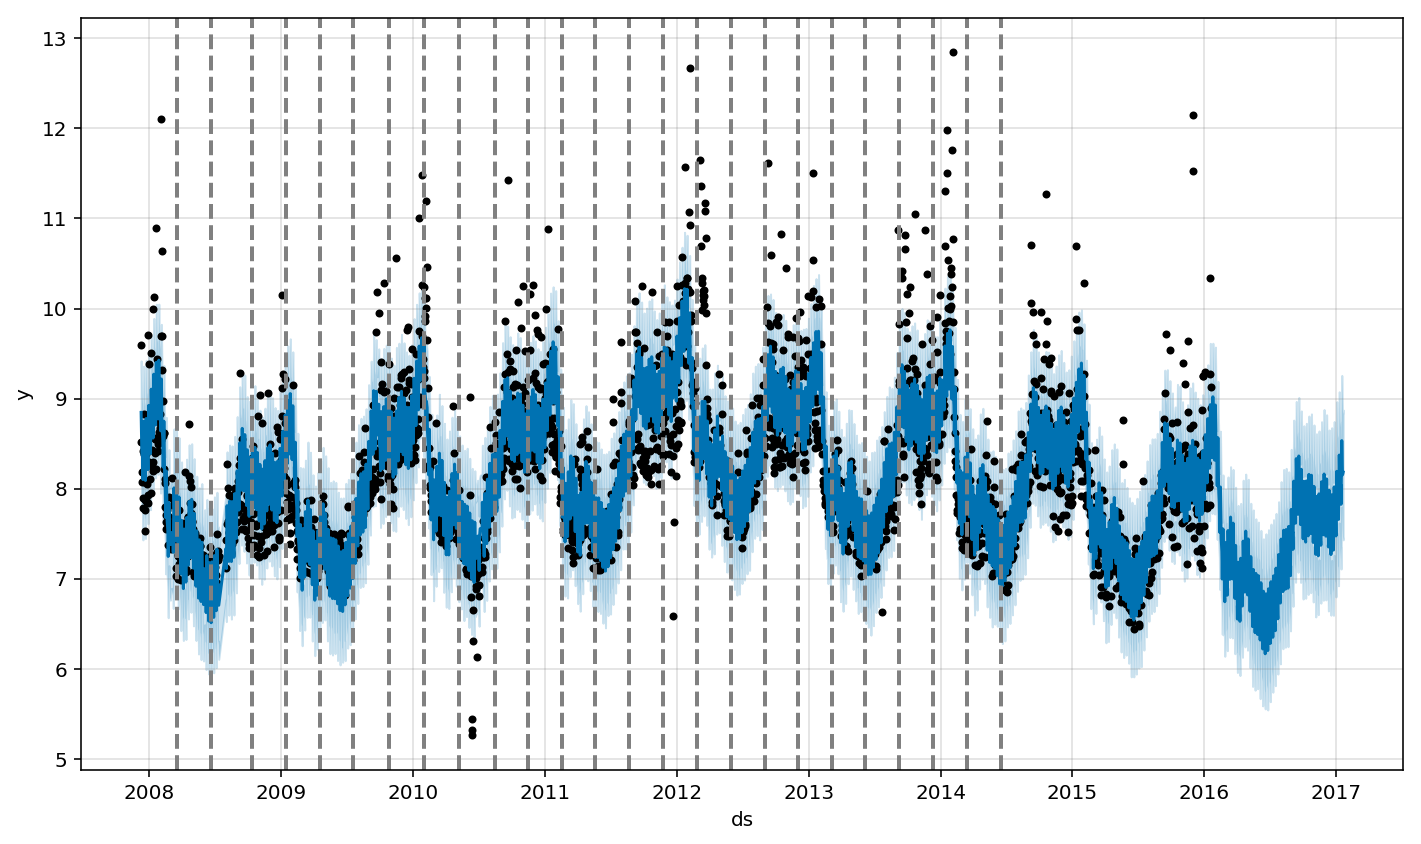

In [3]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=366)
forecast = m.predict(future)
fig = m.plot(forecast)
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

In [4]:
m.changepoints

93     2008-03-17
186    2008-06-20
279    2008-10-11
372    2009-01-14
465    2009-04-17
558    2009-07-19
651    2009-10-27
744    2010-02-01
837    2010-05-07
930    2010-08-15
1023   2010-11-16
1116   2011-02-17
1208   2011-05-20
1301   2011-08-21
1394   2011-11-24
1487   2012-02-27
1580   2012-05-31
1673   2012-09-01
1766   2012-12-03
1859   2013-03-06
1952   2013-06-07
2045   2013-09-09
2138   2013-12-11
2231   2014-03-15
2324   2014-06-16
Name: ds, dtype: datetime64[ns]

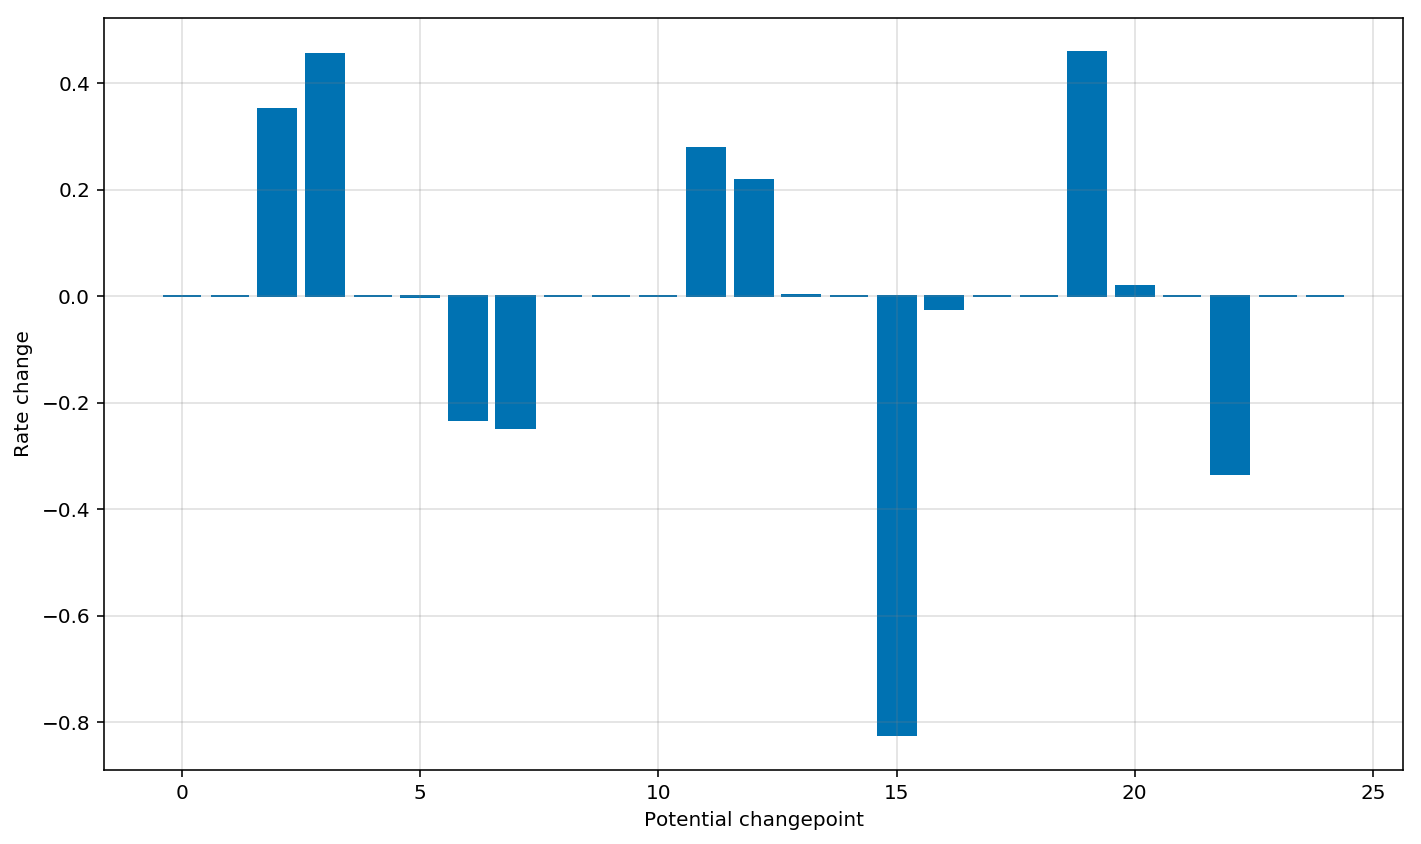

In [5]:
deltas = m.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

* トレンド変化がoverfit(柔軟性が高すぎる）かunderfit(柔軟性が十分でない）だったら、`changepoint_prior_scale` を調整する。
* デフォルトは`0.05`

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/takizawa/dev/python/play/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


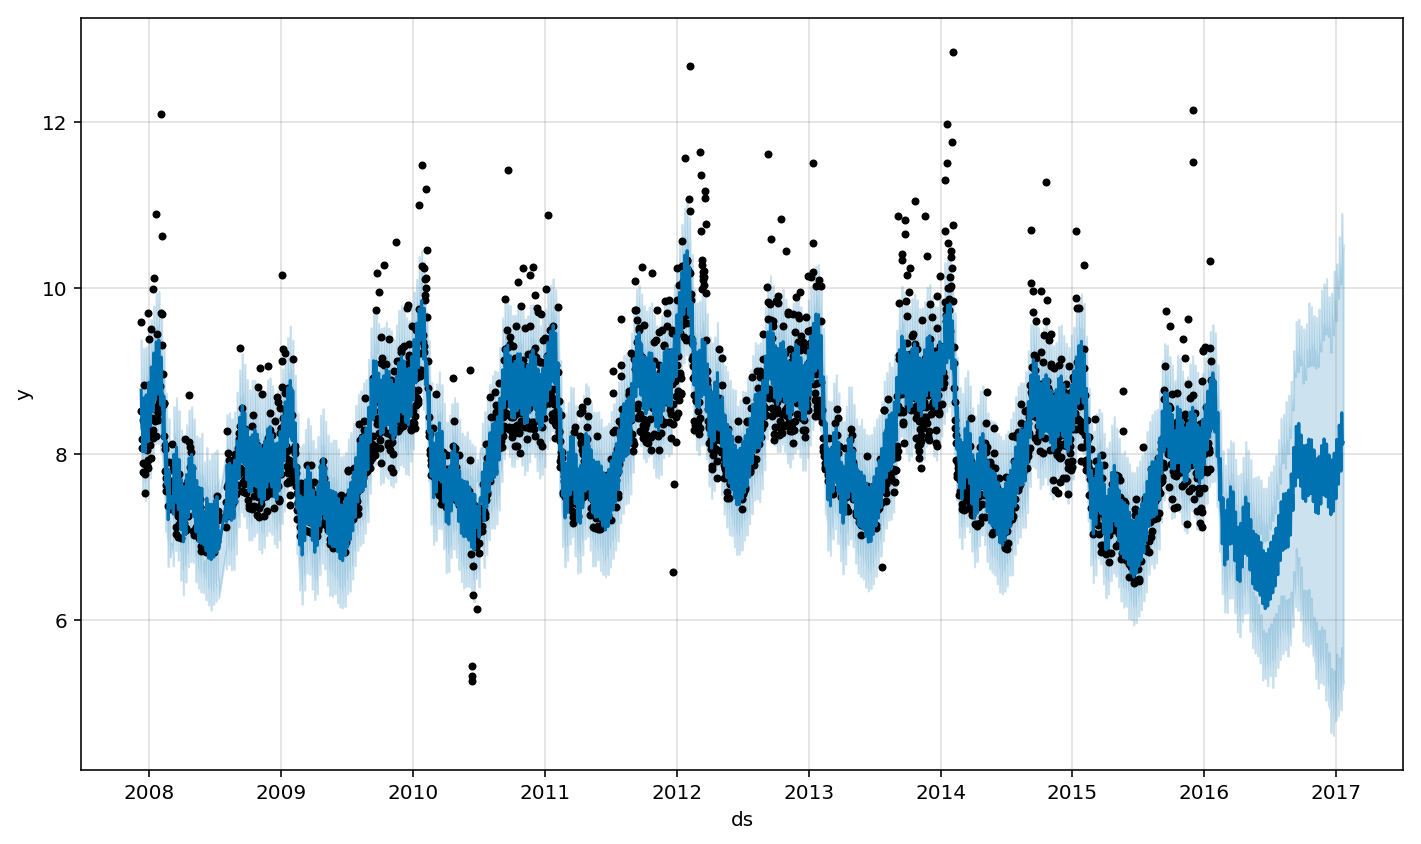

In [6]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
m.plot(forecast);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/takizawa/dev/python/play/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


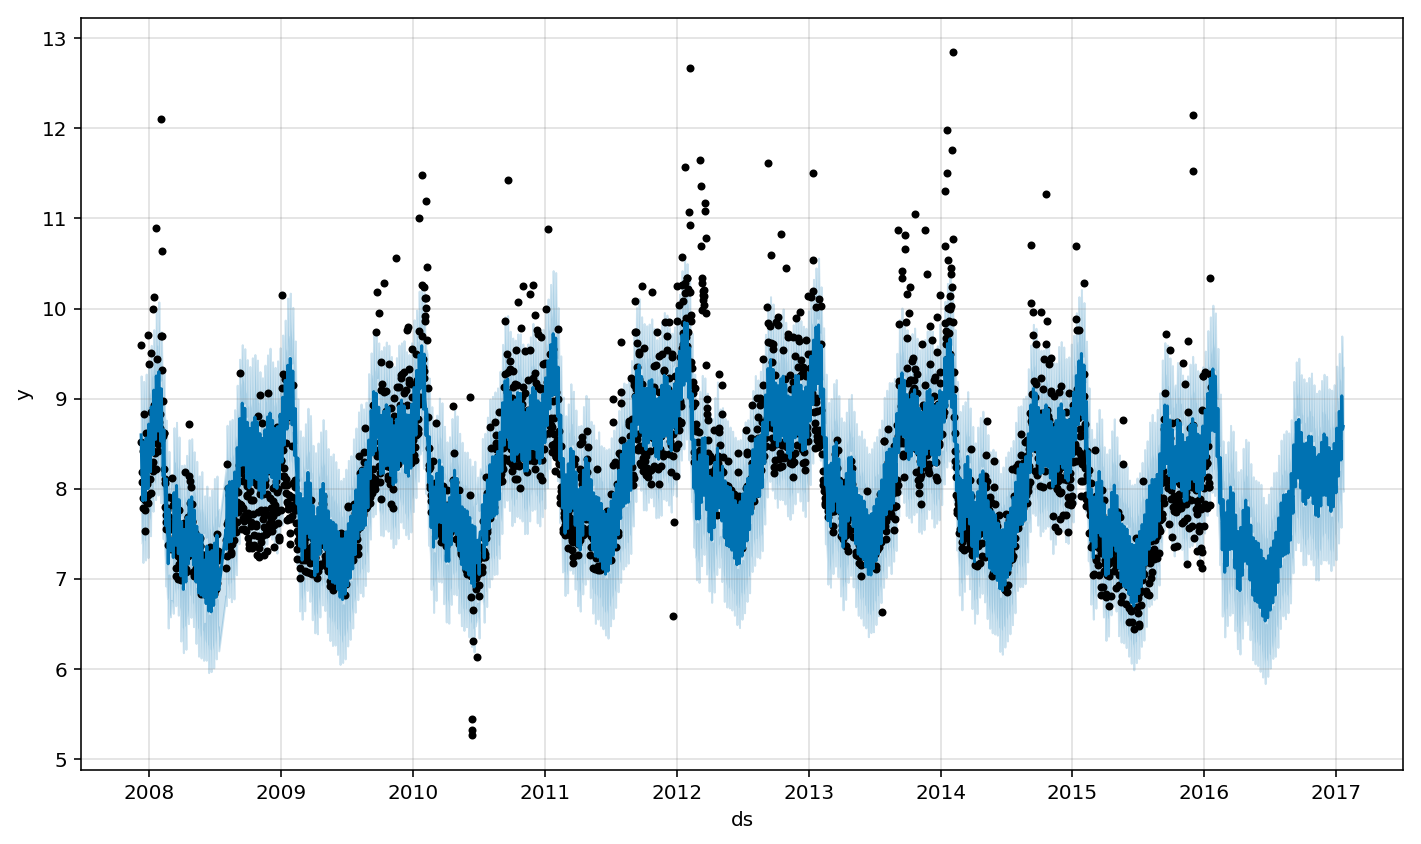

In [7]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
m.plot(forecast);

### Specifying the locations of the changepoints
* 変化点を手動で設定することも可能。

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/takizawa/dev/python/play/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


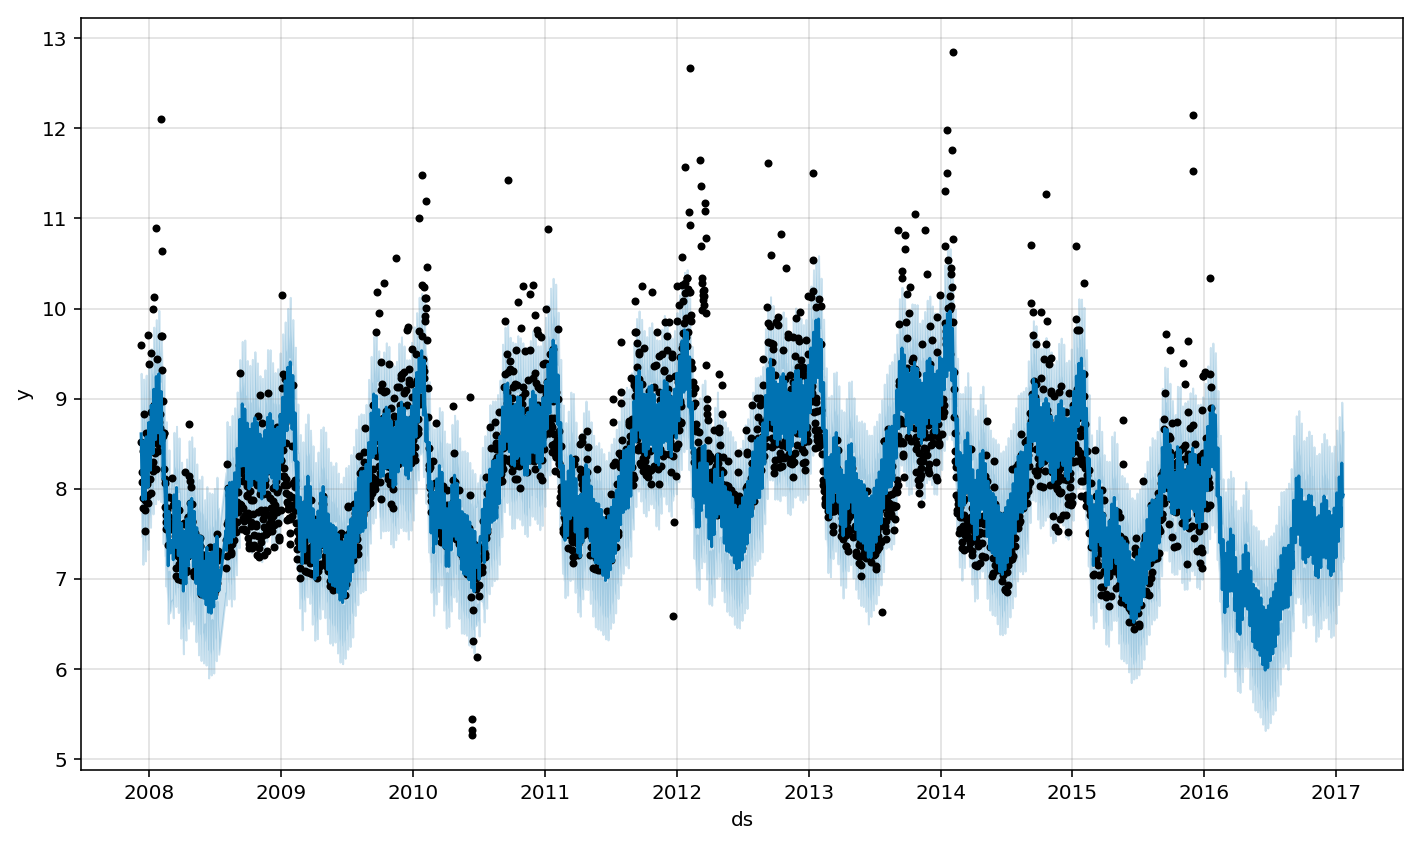

In [8]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
m.plot(forecast);

* 2014年1月1日に変化点を指定することで、下降傾向が強まり、前述のグラフよりも予測が下向いているようだ。